# Loan Default Prediction with Naive Bayes model
#### Implemented from scratch
<br/>Before you start, click to download the data set (both training set and test set) from the [source website](https://tianchi.aliyun.com/competition/entrance/531830/information?lang=en-us) or download it from [Google Drive](https://drive.google.com/drive/folders/1FHJycjwZIBU-rHuDvBtTves-RSn9orc9?usp=sharing) instead.

In [1]:
from math import *
import numpy as np
import csv
import seaborn as sns
from defaultlist import defaultlist
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

#### Import dataset
#### The default dataset is the smallest sample set with a shape of 150*32.
##### *Note: Please insert your file path and file name here*

In [2]:
path = ".\\datasets\\"
filename = 'sample-150.csv'
# filename = 'sample-100k.csv'

In [3]:
'''
IMPORT DATASET while Dropping unusable columns
    Dropped column ID: 32+
'''

dataset = defaultlist()
with open(path + filename, 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        if not row:
            continue
        dataset.append(row[:32])
dataset = np.asarray(dataset)

print("The file size (including the header row) is", len(dataset))

The file size (including the header row) is 152


#### Data Preprocessing

In [4]:
'''
Convert data types
    Int type column ID: 0,2,9,11,13,27,28
    Float type column ID: 1,3,4,10,14,15,18,19,20,21,26,27,30,31
    Str type column ID: 5,6,7,8,12,16,17,22,23,24,29
'''

"If you encounter error in this section, please rerun the entire script. The error usually goes away."

def convert(dataset):
    toInt = [0,2,9,11,13,27,28]
    toFloat = [1,3,4,10,14,15,18,19,20,21,26,27,30,31]
    newDataset = list()
    
    for i in range(0, len(dataset[0])):
        line = list()
        line = np.asarray(dataset)[:,i]
        # line = np.array(dataset)[i]
        # print(i,line[0])
        newLine = list()
        newLine.append(line[0])
        if (i) in toInt:
            for j in range(1, len(line)):
                if line is not None:
                    newLine.append(int(line[j]))
        elif (i) in toFloat:
            for j in range(1, len(line)):
                if line is not None:
                    newLine.append(float(line[j]))
        else:
            for j in range(1, len(line)):
                if line is not None:
                    newLine.append(str(line[j]))
        newDataset.append(newLine)
    return newDataset

dataset = convert(dataset)

#### Data set split

In [5]:
'''
Split training set / test set
    class name: isDefault
    class value: {0, 1}
'''

x_train = list()
y_train = list()
x_train_str_type_only = list()
x_train_num_type_only = list()
x_train_gaussian = list()
classloc = 13 # isDefault's column id

"Training set"
x_train = np.asarray((dataset[:classloc] + dataset[classloc+1:]), dtype='O')
x_train = np.asarray(x_train[:,1:], dtype='O')
# print(x_train)

y_train = np.asarray(dataset[classloc], dtype='O')
y_train = np.asarray(y_train[1:], dtype='O')
# print(y_train)

38 151


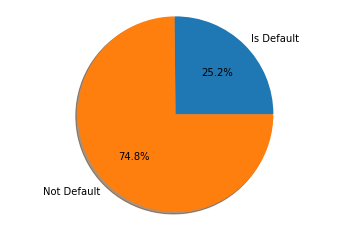

In [6]:
"BEFORE DATASET SPLIT"

labels = ["Is Default", "Not Default"]
y_train_total_size = y_train.size
isDefault_count = 0
for item in y_train:
    if item == 1:
        isDefault_count += 1
print(isDefault_count, y_train_total_size)
sizes = [isDefault_count, y_train_total_size-isDefault_count]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [7]:
'''
Stratify train/test split with Sklearn
'''

print(x_train.shape, y_train.shape)
x_train, x_test, y_train, y_test = train_test_split(x_train.T, y_train, stratify=y_train, test_size=0.5)

x_train = x_train.T
x_test = x_test.T

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31, 151) (151,)
(31, 75)
(31, 76)
(75,)
(76,)


In [8]:
'''
Str type column ID: 5,6,7,8,12,29
    Note: Column ID after 13 needs to minus one because 'isDefault' (@ index 13) is already taken out from x_train
'''
x_train_str_type_only = np.asarray((x_train.tolist()[5: 9] + x_train.tolist()[12:13] + x_train.tolist()[28:29]), dtype='str')
x_test_str_type_only = np.asarray((x_test.tolist()[5: 9] + x_test.tolist()[12:13] + x_test.tolist()[28:29]), dtype='str')

'''
Int/Float type columns
'''
x_train_num_type_only = np.asarray((x_train.tolist()[0:5] + x_train.tolist()[9:12] + x_train.tolist()[13:27] + x_train.tolist()[29:32]), dtype='O')
x_test_num_type_only = np.asarray((x_test.tolist()[0:5] + x_test.tolist()[9:12] + x_test.tolist()[13:27] + x_test.tolist()[29:32]), dtype='O')

'''
Those features that are meaningful for a Gaussian Naive Bayes algorithm
'''
x_train_gaussian = np.vstack((np.asarray(x_train.tolist()[1:5], dtype='O'), np.asarray(x_train.tolist()[9:11], dtype='O'), np.asarray(x_train.tolist()[19:21], dtype='O')))
x_test_gaussian = np.vstack((np.asarray(x_test.tolist()[1:5], dtype='O'), np.asarray(x_test.tolist()[9:11], dtype='O'), np.asarray(x_test.tolist()[19:21], dtype='O')))

'''
Split data by class
'''
zero_idx = list()
for i in range(len(y_train)):
    if y_train[i] == 0:
        zero_idx.append(i)

t = x_train_gaussian.T.tolist()
x_train_gaussian0 = list()
x_train_gaussian1 = list()
idx = 0
for i in range(len(t)):
    if idx < len(zero_idx) and i == zero_idx[idx]:
        x_train_gaussian0.append(t[i])
        idx += 1
    else:
        x_train_gaussian1.append(t[i])
x_train_gaussian0 = np.asarray(x_train_gaussian0, dtype='O')
x_train_gaussian1 = np.asarray(x_train_gaussian1, dtype='O')

t = x_test_gaussian.T.tolist()
x_test_gaussian0 = list()
x_test_gaussian1 = list()
idx = 0
for i in range(len(t)):
    if idx < len(zero_idx) and i == zero_idx[idx]:
        x_test_gaussian0.append(t[i])
        idx += 1
    else:
        x_test_gaussian1.append(t[i])
x_test_gaussian0 = np.asarray(x_test_gaussian0, dtype='O')
x_test_gaussian1 = np.asarray(x_test_gaussian1, dtype='O')

19 76


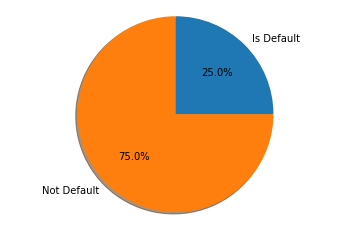

In [9]:
"AFTER DATASET SPLIT"

labels = ["Is Default", "Not Default"]
total_size = y_test.size
isDefault_count = 0
for item in y_test:
    if item == 1:
        isDefault_count += 1
print(isDefault_count, total_size)
sizes = [isDefault_count, total_size-isDefault_count]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [10]:
"STAT UTILITY FUNCTIONS"

def mean(numbers):
    return sum(numbers) / float(len(numbers))

def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

def gaussian_dist_likelihood(data, mean, stdev):
    exponent = exp(-((data - mean)**2 / (2 * stdev**2 )))
    likelihood = (1 / (sqrt(2 * pi) * stdev)) * exponent
    return likelihood

'''
CALCULATION UTILITY FUNCTIONS
    P(C|x) = P(x|C)*P(C) / P(x)
    We only care about maximizing the MAP: P(x|C)*P(C)
'''

def calculate_pC(arr, target_elem): # P(C)
    num_elem_in_class = 0
    for a in arr:
        if target_elem == a:
            num_elem_in_class += 1

    "Laplacian correction"
    return (num_elem_in_class+1)/len(arr)


#### Feature encoding

In [11]:
# y
y_labels = [0,1] # two possible values of isDefault
y_store = dict()
for label in y_labels:
    y_store[label] = calculate_pC(y_train, int(label))

In [12]:
'''
Categorical data analysis
Long running time alert
'''

x_store_cat = dict()
x_labels_cat = list() # for features with categorical data only
for feature in x_train:
    if type(feature[0]) == str:
        label_per_feature = list()
        for data in feature:
            if data not in label_per_feature:
                label_per_feature.append(data)
        x_labels_cat.append(label_per_feature)
num_labels = list()
for feature in x_labels_cat:
    num_labels.append(len(feature))


"Str type column header: [grade, subGrade, employmentTitle, employmentLength, issueDate, earliestCreditLine]"
print("Number of labels for each feature column: ", num_labels)

"Since there are way too many categories in some categorical columns, it's not meaningful to label them by their categories"
# grade
feature1 = x_train_str_type_only[0]
feature1_store = dict()
for i in range(len(feature1)-1):
    label = feature1[i]
    feature1_store[label] = calculate_pC(feature1, str(label))
x_store_cat = feature1_store
x_labels_cat = x_labels_cat[0]


Number of labels for each feature column:  [6, 24, 72, 12, 48, 29, 75, 3, 2, 75, 66, 67]


#### Model Training & prediction
###### *Note: Implemented with the log value of the probabilities to avoid underflow*

In [13]:
def fit_gaussian(dataset):
    prob_table_gaussian = list()
    for feature in dataset.T:
        likelihoods = list()
        feature_mean = mean(feature)
        feature_stdev = stdev(feature)
        for data in feature:
            likelihood = gaussian_dist_likelihood(data, feature_mean, feature_stdev) # P(x|C)
            likelihoods.append(likelihood)
        prob_table_gaussian.append(likelihoods)
    return np.asarray(prob_table_gaussian)

In [14]:

def calculate_class_probabilities(model, test):
	total_rows = sum([model[label][0][2] for label in model])
	probabilities = dict()
	for class_value, class_summaries in model.items():
		probabilities[class_value] = model[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, _ = class_summaries[i]
			probabilities[class_value] *= calculate_probability(test[i], mean, stdev)
	return probabilities

def predict(x_train_gaussian, x_test_gaussian):
	probabilities = calculate_class_probabilities(x_train_gaussian, x_test_gaussian)
	best_label, best_prob = None, -1
	for class_value, probability in probabilities.items():
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return best_label

In [15]:
def predict(test0, test1):
    result = list()
    prob_table0 = fit_gaussian(test0).transpose()
    prob_table1 = fit_gaussian(test1).transpose()
    # print(prob_table0.shape)
    # print(prob_table1.shape)
    t0 = test0 # feature * data -> data * feature
    t1 = test1
    # print("t0=",t0.shape,"t1=",t1.shape)
    prob0 = 0.0
    prob1 = 0.0
    prob_table0 = prob_table0.transpose()
    prob_table1 = prob_table1.transpose()
    # For each data
    for j in range(min(t0.shape[0],t1.shape[0])):
        # For each feature
        idx = min(t0.shape[1], t1.shape[1])
        for i in range(idx):
            "Take the logarithm of the probabilities to avoid underflow"
            # print(prob_table0[j][i])
            prob0 += log(prob_table0[i][j]) # P(x1|c)*P(x2|c)*...*P(xn|c)
            # prob *= prob_table[j][i] # P(x1|c)*P(x2|c)*...*P(xn|c)
        prob0 += log(x_store_cat[x_train_str_type_only[0][j]]) # categorical data
        # prob *= (x_store_cat[x_train_str_type_only[0][j]]) # categorical data
        prob0 += log(y_store[0])  # P(x|C) * P(C)

        for i in range(idx):
            prob1 += log(prob_table1[i][j])
        prob1 += log(x_store_cat[x_train_str_type_only[0][j]])
        prob1 += log(y_store[1])

        if prob0 > prob1:
            result.append(0)
        else:
            result.append(1)
    return np.asarray(result)

def scoring(y_test, result):
    acc = 0
    size = min(len(y_test),len(result))
    for i in range(size):
        if y_test[i] == result[i]:
            acc += 1
    # print("y_test=",y_test)
    # print("result=",result)
    # print("acc=",acc)
    return acc / size

result = predict(x_test_gaussian0, x_test_gaussian1)
# print("y_test=",y_test[:20])
# print("result=",result)
accuracy = scoring(y_test[:20], result)
print("The test accuracy is", accuracy)
auc_score = roc_auc_score(np.asarray(y_test.tolist()[:len(result)]).astype(int), np.asarray(result).astype(int))
print("The AUC score is", auc_score)

The test accuracy is 0.7
The AUC score is 0.5
